In [18]:
sys.path.append("..")
import os
import utils
import plot
import numpy as np
import pandas as pd

In [26]:
dir_path = "../"
relative_path = "results/10_simulations_fhi_policy_2021_05_27_12_24_46"
path = dir_path + relative_path
mdp_paths_path   =   f"{path}/mdp_paths.pkl"
mdp_reffs_path   =   f"{path}/mdp_reffs.pkl"
start_date_population_age_labels_path = f"{path}/start_date_population_age_labels.pkl"

paths = utils.create_named_tuple('paths', 'filepaths.txt')
config = utils.create_named_tuple('config', paths.config)

start_date, population, age_labels = utils.read_pickle(start_date_population_age_labels_path)
mdp_path = utils.read_pickle(mdp_paths_path)
R_effs = utils.read_pickle(mdp_reffs_path)


In [28]:
len(mdp_path)

10

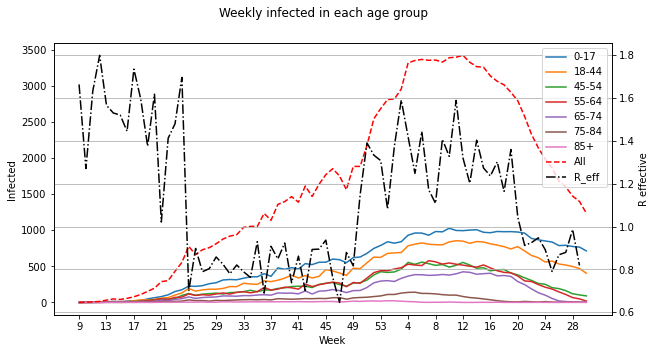

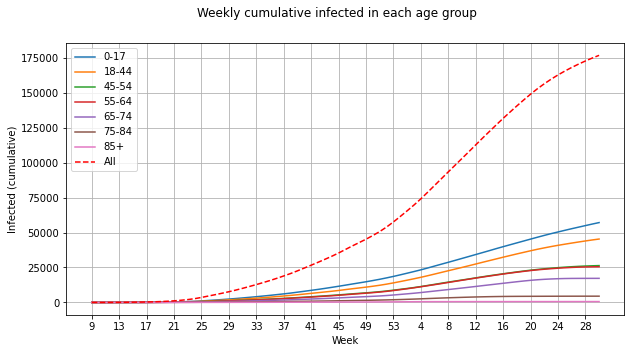

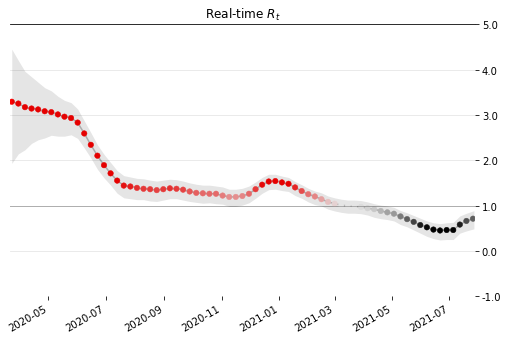

In [20]:
    history, new_infections = utils.transform_path_to_numpy(mdp_path)
    results_age = history.sum(axis=2)
    results_regions = history.sum(axis=3)
    infection_results_age = new_infections.sum(axis=1)
    infection_results_regions = new_infections.sum(axis=2)
    regions_to_plot = ['OSLO', 'TRONDHEIM', 'LØRENSKOG', 'STEINKJER']
    comps_to_plot = ["E2", "A", "I"]

    plot.age_group_infected_plot_weekly(results_age, start_date, age_labels, R_eff, include_R=True)
    plot.age_group_infected_plot_weekly_cumulative(infection_results_age, start_date, age_labels)
    utils.get_r_effective(mdp_path, population, config, from_data=False)
    #plot.seir_plot_weekly_several_regions(results_regions, start_date, comps_to_plot, regions_to_plot, paths.municipalities_names)
    #plot.infection_plot_weekly_several_regions(infection_results_regions, start_date, regions_to_plot, paths.municipalities_names)